In [242]:
import re

cptIteration = 0
precedent = "SCORE"
processEnCours = "NaN"

with open("libio_file/fast3.txt","r") as f, open("sortie_libio4.csv","w") as outfile:
     
        
        for i in f.readlines():
            
            z = re.findall("^Process (\d+) :", i)
            if z :
                processEnCours = z[0]
            
            x = re.findall("^IGSP65 : \[(.*)\]", i)
            
            if x :
                
                if (precedent != "SCORE"):
                    outfile.write(",NaN,NaN,NaN\n")
                
                
                # Si la ligne précédente n'est pas Score
                cptIteration += 1 
                outfile.write(str(cptIteration) + ",")
                gains = re.sub(r', ', ',', x[0]) 
                tabGains = gains.split(",")

                if (len(tabGains) != 11):
                    gains = "NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN"
                    #for n in range(11):
                        #gains += tabGains[n] + ","
                        
                outfile.write(gains)
                
                precedent = "IGSP65"
                
                
            else :
                y = re.findall("^Score = \((.*)\)", i)
                if y :
                    
                    if (precedent != "IGSP65"):
                        cptIteration += 1 
                        
                        outfile.write(str(cptIteration) + ",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN")
                        #outfile.write("," + processEnCours)
                    
                    scores = re.sub(r', ', ',', y[0])              
                    outfile.write("," + processEnCours + "," + scores + "\n")
                    precedent = "SCORE"

f.close()
outfile.close()

In [9]:
import pandas as pd
import numpy as np

data = pd.read_csv('sortie_libio.csv',names=['Iteration','IGSP65_1','IGSP65_2','IGSP65_3','IGSP65_4',
                                  'IGSP65_5','IGSP65_6','IGSP65_7','IGSP65_8','IGSP65_9',
                                  'IGSP65_10','IGSP65_11','Process','Score1','Score2'],dtype={'Process':object})
data=pd.DataFrame(data)
print (data)

       Iteration  IGSP65_1  IGSP65_2  IGSP65_3  IGSP65_4  IGSP65_5  IGSP65_6  \
0              1      -1.1       6.7       2.2       5.8      11.2       6.9   
1              2      -8.0      -0.2      -4.7       1.2       6.6       7.7   
2              3      -4.5       3.3      -1.2      -3.7       1.7       7.6   
3              4      -6.9       0.9      -3.6       3.9       9.3       8.6   
4              5      -9.0      -1.2      -5.7       7.0      12.4      11.5   
...          ...       ...       ...       ...       ...       ...       ...   
10110      10111      -4.1       3.7      -0.8       7.7      13.1      11.2   
10111      10112      -5.0       2.8      -1.7       6.7      12.1      10.3   
10112      10113      -7.0       0.8      -3.7       4.7      10.1       8.2   
10113      10114      -4.5       3.3      -1.2       7.3      12.7      10.8   
10114      10115      -4.6       3.2      -1.3       7.3      12.7      10.7   

       IGSP65_7  IGSP65_8  IGSP65_9  IG

In [22]:
data4.dtypes
data['Score1Max'] = data.Score1.cummax(skipna=True)
data['Score2Max'] = data.Score2.cummax(skipna=True)
#data4['IGSP65_1'] = data4['IGSP65_1'].astype(float)

/Users/Aynaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


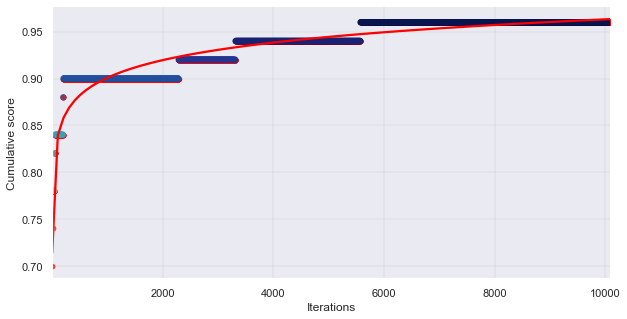

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y = data4['Score1Max']
x = data4['Iteration']
fig, ax = plt.subplots(figsize=(10, 5))

sns.regplot(x, y,x_estimator=np.mean, logx=True,marker='o', color='red', scatter_kws={'s':20})
#assigns a color to each data point
ax.scatter(x, y, alpha=0.1, s = 30,c = y,cmap = 'YlGnBu')
#adds a title and axes labels
ax.set_xlabel('Iterations')
ax.set_ylabel('Cumulative score')
 
#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#adds major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.savefig('plot47.png', dpi=300, bbox_inches='tight')
plt.show()

/Users/Aynaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


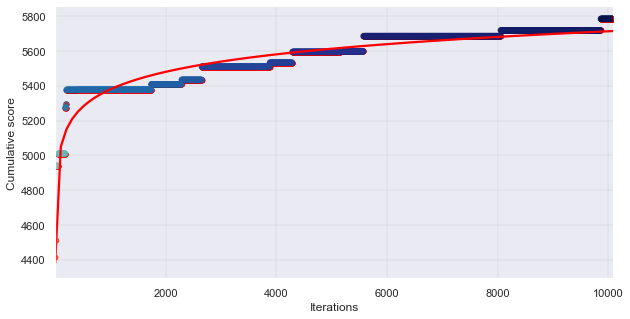

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y = data4['Score2Max']
x = data4['Iteration']
fig, ax = plt.subplots(figsize=(10, 5))

sns.regplot(x, y,x_estimator=np.mean, logx=True,marker='o', color='red', scatter_kws={'s':20})
#assigns a color to each data point
ax.scatter(x, y, alpha=0.1, s = 30,c = y,cmap = 'YlGnBu')
#adds a title and axes labels
ax.set_xlabel('Iterations')
ax.set_ylabel('Cumulative score')
 
#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#adds major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.savefig('plot48.png', dpi=300, bbox_inches='tight')
plt.show()

/Users/Aynaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:301: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/Users/Aynaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:301: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/Users/Aynaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:301: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/Users/Aynaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:301: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/Users/Aynaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:301: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


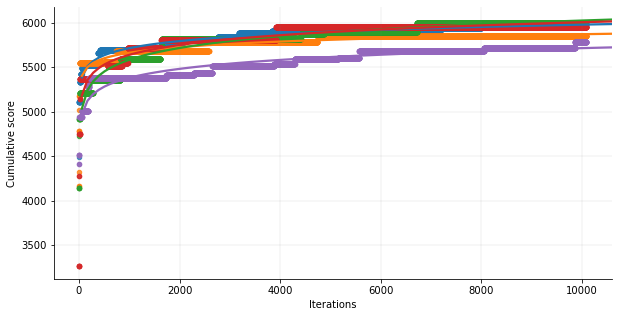

In [32]:
import pandas
import matplotlib.pyplot as plt
import seaborn

df = {
    'x_a': data['Score2Max'],
    'x_b': data1['Score2Max'],
    'x_c': data2['Score2Max'],
    'x_d': data3['Score2Max'],
    'x_e': data4['Score2Max'],
    'y': data4['Iteration']
}

data_frame = pandas.DataFrame(df)

fig, ax = plt.subplots(figsize=(10, 5))

seaborn.regplot(y='x_a', x='y', data=data_frame, truncate=False, ax=ax,logx=True,marker='o', scatter_kws={'s':20})
seaborn.regplot(y='x_b', x='y', data=data_frame, truncate=False, ax=ax,logx=True,marker='o', scatter_kws={'s':20})
seaborn.regplot(y='x_c', x='y', data=data_frame, truncate=False, ax=ax,logx=True,marker='o', scatter_kws={'s':20})
seaborn.regplot(y='x_d', x='y', data=data_frame, truncate=False, ax=ax,logx=True,marker='o', scatter_kws={'s':20})
seaborn.regplot(y='x_e', x='y', data=data_frame, truncate=False, ax=ax,logx=True,marker='o', scatter_kws={'s':20})
sns.color_palette("Set2")
ax.set_xlabel('Iterations')
ax.set_ylabel('Cumulative score')
#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#adds major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.savefig('plot26.png', dpi=300, bbox_inches='tight')
plt.show() 

In [16]:
data

,Iteration,IGSP65_1,IGSP65_2,IGSP65_3,IGSP65_4,IGSP65_5,IGSP65_6,IGSP65_7,IGSP65_8,IGSP65_9,IGSP65_10,IGSP65_11,Process,Score1,Score2
0,1,-1.1,6.7,2.2,5.8,11.2,6.9,5.5,19.7,16.6,32.8,38.1,8,0.72,4492.24
1,2,-8.0,-0.2,-4.7,1.2,6.6,7.7,6.3,21.1,18.0,30.5,38.8,8,0.86,5111.66
2,3,-4.5,3.3,-1.2,-3.7,1.7,7.6,6.2,19.0,15.9,26.6,40.9,8,0.86,4948.72
3,4,-6.9,0.9,-3.6,3.9,9.3,8.6,7.2,25.4,22.3,27.8,37.5,8,0.70,4300.20
4,5,-9.0,-1.2,-5.7,7.0,12.4,11.5,10.1,20.4,17.3,27.9,43.2,8,0.78,5090.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10110,10111,-4.1,3.7,-0.8,7.7,13.1,11.2,9.8,15.3,12.2,31.2,36.5,18,0.92,5626.06
10111,10112,-5.0,2.8,-1.7,6.7,12.1,10.3,8.9,14.5,11.4,30.3,38.6,18,0.92,5718.98
10112,10113,-7.0,0.8,-3.7,4.7,10.1,8.2,6.8,12.5,9.4,28.4,42.0,18,0.86,5364.88
10113,10114,-4.5,3.3,-1.2,7.3,12.7,10.8,9.4,14.8,11.7,30.9,36.2,18,0.92,5625.98


/Users/Aynaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:301: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/Users/Aynaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:301: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/Users/Aynaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:301: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/Users/Aynaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:301: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/Users/Aynaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:301: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


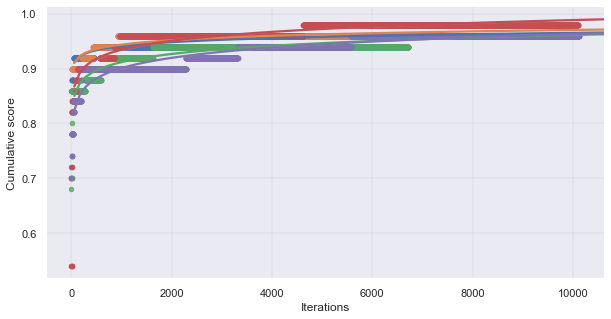

In [254]:
import pandas
import matplotlib.pyplot as plt
import seaborn

df = {
    'x_a': data['Score1Max'],
    'x_b': data1['Score1Max'],
    'x_c': data4['Score1Max'],
    'x_d': data4['Score1Max'],
    'x_e': data4['Score1Max'],
    'y': data['Iteration']
}

data_frame = pandas.DataFrame(df)

fig, ax = plt.subplots(figsize=(10, 5))

seaborn.regplot(y='x_a', x='y', data=data_frame, truncate=False, ax=ax,logx=True,marker='o', scatter_kws={'s':20})
seaborn.regplot(y='x_b', x='y', data=data_frame, truncate=False, ax=ax,logx=True,marker='o', scatter_kws={'s':20})
seaborn.regplot(y='x_c', x='y', data=data_frame, truncate=False, ax=ax,logx=True,marker='o', scatter_kws={'s':20})
seaborn.regplot(y='x_d', x='y', data=data_frame, truncate=False, ax=ax,logx=True,marker='o', scatter_kws={'s':20})
seaborn.regplot(y='x_e', x='y', data=data_frame, truncate=False, ax=ax,logx=True,marker='o', scatter_kws={'s':20})
sns.color_palette("Set2")
ax.set_xlabel('Iterations')
ax.set_ylabel('Cumulative score')
#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#adds major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.savefig('new.png', dpi=300, bbox_inches='tight')
plt.show()

In [546]:
#subdata1=data1[data1.columns[pd.Series(data1.columns).str.startswith('IGSP65')]]
#subdata=[1,2,3,4,5,6,7,8,9,10,11]
#for i in subdata1:
#data1['abs_diff_IGSP65_11'] =data1.groupby("Process").eq(0).["IGSP65_1"].cumsum().abs().round(1)
#data1.groupby('Process')[i].apply(lambda x: x.shift().expanding().sum())

In [181]:
data.dtypes

Iteration      int64
IGSP65_1     float64
IGSP65_2     float64
IGSP65_3     float64
IGSP65_4     float64
IGSP65_5     float64
IGSP65_6     float64
IGSP65_7     float64
IGSP65_8     float64
IGSP65_9     float64
IGSP65_10    float64
IGSP65_11    float64
Process       object
Score1       float64
Score2       float64
Score1Max    float64
Score2Max    float64
dtype: object

In [182]:
#data1['IGSP65_11'] = data1['IGSP65_11'].astype(float)

In [24]:
#data4=data
rslt=data4.loc[: ,"IGSP65_1":"Process"].groupby(['Process']).diff().abs().round(1)
data4=pd.concat([data4,rslt],axis=1)

In [25]:
data4['abs_diff_IGSP65_mean'] = rslt.mean(axis=1).round(1)
data4['abs_diff_IGSP65_max'] = rslt.max(axis=1).round(1)
data4.columns=['Iteration','IGSP65_1','IGSP65_2','IGSP65_3','IGSP65_4',
                                  'IGSP65_5','IGSP65_6','IGSP65_7','IGSP65_8','IGSP65_9',
                                  'IGSP65_10','IGSP65_11','Process','Score1','Score2','Score1Max','Score2Max','abs_diff_IGSP65_1','abs_diff_IGSP65_2','abs_diff_IGSP65_3','abs_diff_IGSP65_4',
                                  'abs_diff_IGSP65_5','abs_diff_IGSP65_6','abs_diff_IGSP65_7','abs_diff_IGSP65_8','abs_diff_IGSP65_9',
                                  'abs_diff_IGSP65_10','abs_diff_IGSP65_11','abs_diff_IGSP65_mean','abs_diff_IGSP65_max']
#data1.dtypes

In [26]:
data4['abs_diff_IGSP65_123'] = data4[['abs_diff_IGSP65_1', 'abs_diff_IGSP65_2', 'abs_diff_IGSP65_3']].mean(axis=1).round(1)
data4['abs_diff_IGSP65_45'] = data4[['abs_diff_IGSP65_4', 'abs_diff_IGSP65_5']].mean(axis=1).round(1)
data4['abs_diff_IGSP65_67'] = data4[['abs_diff_IGSP65_6', 'abs_diff_IGSP65_7']].mean(axis=1).round(1)
data4['abs_diff_IGSP65_89'] = data4[['abs_diff_IGSP65_8', 'abs_diff_IGSP65_9']].mean(axis=1).round(1)
data4['abs_diff_IGSP65_mean'] = data4[['abs_diff_IGSP65_123','abs_diff_IGSP65_45','abs_diff_IGSP65_67','abs_diff_IGSP65_89','abs_diff_IGSP65_10','abs_diff_IGSP65_11']].mean(axis=1).round(1)
data4['nb_iter']=data4.groupby(['Process'],dropna=False).cumcount()
data4['nb_iter']=data4['nb_iter'].apply(lambda x: float(x))
data4.columns=['Iteration','IGSP65_1','IGSP65_2','IGSP65_3','IGSP65_4',
                                  'IGSP65_5','IGSP65_6','IGSP65_7','IGSP65_8','IGSP65_9',
                                  'IGSP65_10','IGSP65_11','Process','Score1','Score2','Score1Max','Score2Max','abs_diff_IGSP65_1','abs_diff_IGSP65_2','abs_diff_IGSP65_3','abs_diff_IGSP65_4',
                                  'abs_diff_IGSP65_5','abs_diff_IGSP65_6','abs_diff_IGSP65_7','abs_diff_IGSP65_8','abs_diff_IGSP65_9',
                                  'abs_diff_IGSP65_10','abs_diff_IGSP65_11','abs_diff_IGSP65_mean','abs_diff_IGSP65_max','abs_diff_IGSP65_123','abs_diff_IGSP65_45','abs_diff_IGSP65_67','abs_diff_IGSP65_89','nb_iter']
#data1.dtypes
data4.to_csv('data4.csv') 

/Users/Aynaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


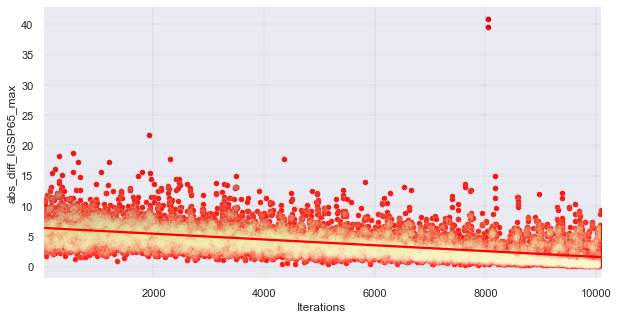

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y = data4['abs_diff_IGSP65_max']
x = data4['Iteration']
fig, ax = plt.subplots(figsize=(10, 5))

p=sns.regplot(x, y,x_estimator=np.mean,marker='o', color='red', scatter_kws={'s':20})
#assigns a color to each data point
ax.scatter(x, y, alpha=0.1, s = 30,c = y,cmap = 'YlGnBu')
#adds a title and axes labels
ax.set_xlabel('Iterations')
ax.set_ylabel('abs_diff_IGSP65_max')
 
#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#adds major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.savefig('plot49.png', dpi=300, bbox_inches='tight')
plt.show()

In [45]:
p.get_lines()[0].get_xdata()
p.get_lines()[0].get_ydata()

array([5.1, 5.1])

/Users/Aynaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


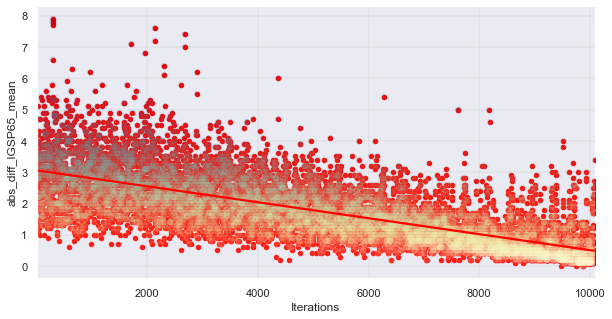

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y = data4['abs_diff_IGSP65_mean']
x = data4['Iteration']
fig, ax = plt.subplots(figsize=(10, 5))

q=sns.regplot(x, y,x_estimator=np.mean,marker='o', color='red', scatter_kws={'s':20})
#assigns a color to each data point
ax.scatter(x, y, alpha=0.1, s = 30,c = y,cmap = 'YlGnBu')
#adds a title and axes labels
ax.set_xlabel('Iterations')
ax.set_ylabel('abs_diff_IGSP65_mean')
 
#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#adds major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.savefig('plot50.png', dpi=300, bbox_inches='tight')
plt.show()

In [47]:
q.get_lines()[0].get_xdata()
q.get_lines()[0].get_ydata()

array([1.8, 1.8])

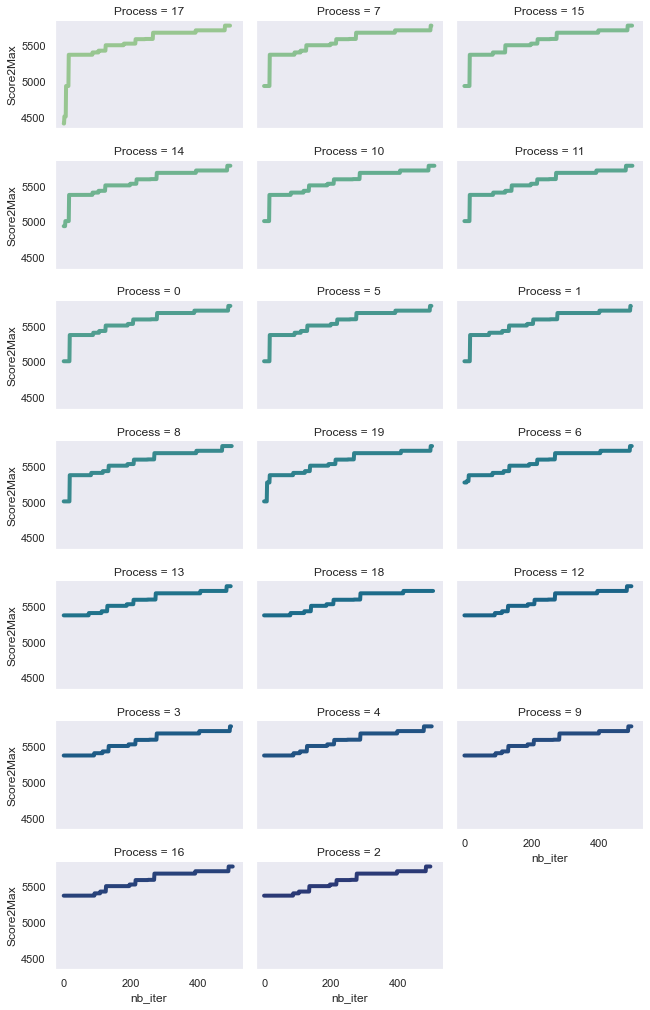

In [48]:
import seaborn as sns

sns.set_theme(style="dark")
#data1 = sns.load_dataset("data1")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=data4,
    x="nb_iter", y="Score2Max", col="Process", hue="Process",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
plt.savefig('plot51.png', dpi=300, bbox_inches='tight')

In [ ]:
df = {
    'x_a': data['Score2Max'],
    'x_b': data1['Score2Max'],
    'x_c': data4['Score2Max'],
    'x_d': data4['Score2Max'],
    'x_e': data4['Score2Max'],
    'y': data4['nb_iter'],
    'c':data4['Process']
}

data_frame = pandas.DataFrame(df)
df1 = pd.DataFrame({'x': data['Score2Max'], 'y1': data4['nb_iter'], 'c': data4['Process']})
df2 = pd.DataFrame({'x': data1['Score2Max'], 'y1': data4['nb_iter'], 'c': data4['Process']})
df3 = pd.DataFrame({'x': data2['Score2Max'], 'y1': data4['nb_iter'], 'c': data4['Process']})
df4 = pd.DataFrame({'x': data3['Score2Max'], 'y1': data4['nb_iter'], 'c': data4['Process']})
df5 = pd.DataFrame({'x': data4['Score2Max'], 'y1': data4['nb_iter'], 'c': data4['Process']})
df = pd.concat([df1, df2,df3,df4,df5]).reset_index(drop=True)
sns.relplot(
    data=data_frame,
    x="y", y="x_b", col="c", hue="c",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,ax=ax
)
sns.relplot(
    data=data_frame,
    x="y", y="x_c", col="c", hue="c",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,ax=ax
)
sns.relplot(
    data=data_frame,
    x="y", y="x_d", col="c", hue="c",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,ax=ax
)
sns.relplot(
    data=data_frame,
    x="y", y="x_e", col="c", hue="c",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,ax=ax
)

/Users/Aynaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:929: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


ValueError: Number of rows must be a positive integer, not 0

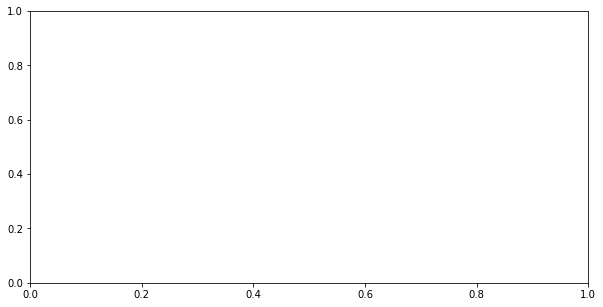

<Figure size 648x0 with 0 Axes>

In [41]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

data_frame = pandas.DataFrame(df)
df1 = pd.DataFrame({'x': data['Score2Max'], 'y': data4['nb_iter'], 'c': data4['Process']})
df2 = pd.DataFrame({'x1': data1['Score2Max'], 'y': data4['nb_iter'], 'c': data4['Process']}).rename(columns={'x1': 'x'})
df3 = pd.DataFrame({'x2': data2['Score2Max'], 'y': data4['nb_iter'], 'c': data4['Process']}).rename(columns={'x2': 'x'})
df4 = pd.DataFrame({'x3': data3['Score2Max'], 'y': data4['nb_iter'], 'c': data4['Process']}).rename(columns={'x3': 'x'})
df5 = pd.DataFrame({'x4': data4['Score2Max'], 'y': data4['nb_iter'], 'c': data4['Process']}).rename(columns={'x4': 'x'})
df = pd.concat([df1, df2,df3,df4,df5]).reset_index(drop=True)
df

fig, ax = plt.subplots(figsize=(10, 5))

sns.relplot(
    data=df,
    x="y", y="x", hue="c",
    kind="line", palette="tab10", linewidth=4, zorder=5,col_wrap=3,
    height=2, aspect=1.5, legend=False,ax=ax
)

#seaborn.regplot(y='x_a', x='y', data=data_frame, truncate=False, ax=ax,logx=True,marker='o', scatter_kws={'s':20})
#sns.color_palette("Set2")
#ax.set_xlabel('Iterations')
#ax.set_ylabel('Cumulative score')
#removing top and right borders
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#adds major gridlines
#ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.savefig('new2.png', dpi=300, bbox_inches='tight')

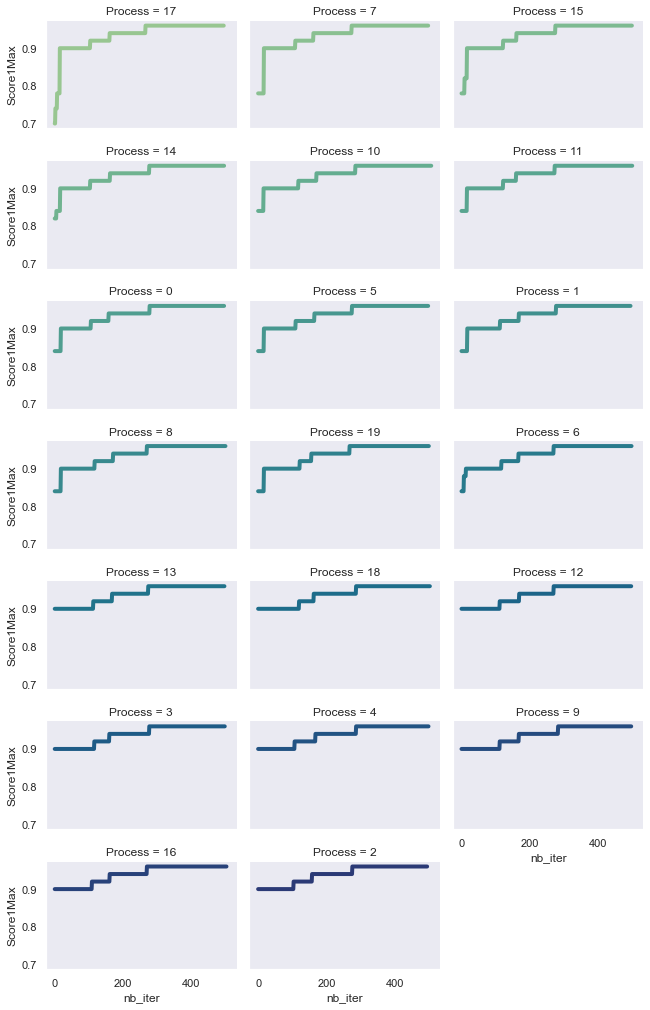

In [49]:
import seaborn as sns

sns.set_theme(style="dark")
#data1 = sns.load_dataset("data1")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=data4,
    x="nb_iter", y="Score1Max", col="Process", hue="Process",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
plt.savefig('plot52.png', dpi=300, bbox_inches='tight')

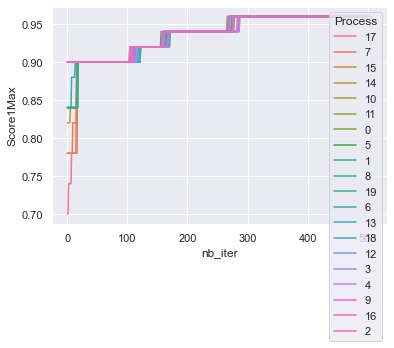

In [50]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x='nb_iter',y='Score1Max',hue='Process',
             data=data4)
plt.savefig('plot53.png', dpi=300, bbox_inches='tight')

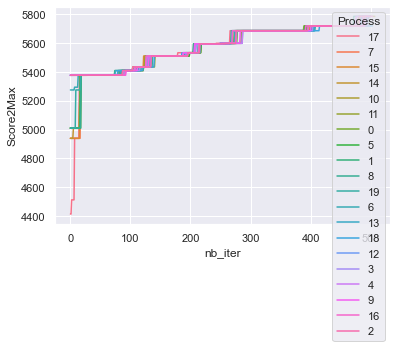

In [51]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x='nb_iter',y='Score2Max',hue='Process',
             data=data4)
plt.savefig('plot54.png', dpi=300, bbox_inches='tight')

[[0.7 ]
 [0.46]
 [0.74]
 ...
 [0.8 ]
 [0.96]
 [0.64]]


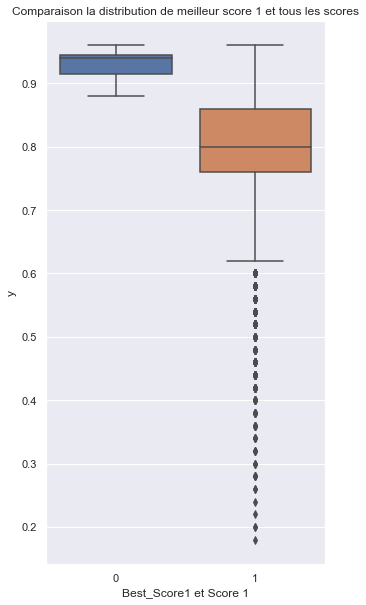

In [52]:
import numpy as np 
import numpy as np
import seaborn as sns

best_score1=np.array(data4[["Score1",'Process']].groupby(['Process']).max())
score1=np.array(data4[["Score1"]])
print(score1)
all_arr = [best_score1,score1]
plt.figure(figsize = (5,10))
sns.boxplot(data=all_arr).set(title='Comparaison la distribution de meilleur score 1 et tous les scores', xlabel='Best_Score1 et Score 1', ylabel='y')
plt.savefig('plot55.png', dpi=300, bbox_inches='tight')

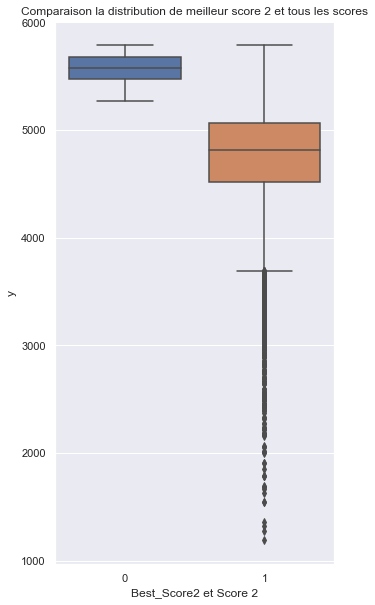

In [53]:
import numpy as np
import seaborn as sns

best_score2=np.array(data4[["Score2",'Process']].groupby(['Process']).max())
score2=np.array(data4[["Score2"]])
all_arr = [best_score2,score2]
plt.figure(figsize = (5,10))
sns.boxplot(data=all_arr).set(title='Comparaison la distribution de meilleur score 2 et tous les scores', xlabel='Best_Score2 et Score 2', ylabel='y')
plt.savefig('plot56.png', dpi=300, bbox_inches='tight')

In [47]:
best_score2=np.array(data[["Score2",'Process']].groupby(['Process']).max())
best_score1=np.array(data[["Score1",'Process']].groupby(['Process']).max())
best_score2_1=np.array(data1[["Score2",'Process']].groupby(['Process']).max())
best_score1_1=np.array(data1[["Score1",'Process']].groupby(['Process']).max())
best_score2_2=np.array(data2[["Score2",'Process']].groupby(['Process']).max())
best_score1_2=np.array(data2[["Score1",'Process']].groupby(['Process']).max())
best_score2_3=np.array(data3[["Score2",'Process']].groupby(['Process']).max())
best_score1_3=np.array(data3[["Score1",'Process']].groupby(['Process']).max())
best_score2_4=np.array(data4[["Score2",'Process']].groupby(['Process']).max())
best_score1_4=np.array(data4[["Score1",'Process']].groupby(['Process']).max())

In [67]:
dataset = pd.DataFrame({'Audiogramme1_Score de reco%': best_score1[:, 0],'Audiogramme1_Score de vraisemblance': best_score2[:, 0],'Audiogramme2_Score de reco%': best_score1_1[:, 0],
                        'Audiogramme2_Score de vraisemblance': best_score2_1[:, 0],'Audiogramme3_Score de reco%': best_score1_2[:, 0],'Audiogramme3_Score de vraisemblance': best_score2_2[:, 0],'Audiogramme4_Score de reco%': best_score1_3[:, 0],
                        'Audiogramme4_Score de vraisemblance': best_score2_3[:, 0],'Audiogramme5_Score de reco%': best_score1_4[:, 0],'Audiogramme5_Score de vraisemblance': best_score2_4[:, 0]})
dataset
dataset.to_csv('dataset.csv') 

,Audiogramme1_Score de reco%,Audiogramme1_Score de vraisemblance,Audiogramme2_Score de reco%,Audiogramme2_Score de vraisemblance,Audiogramme3_Score de reco%,Audiogramme3_Score de vraisemblance,Audiogramme4_Score de reco%,Audiogramme4_Score de vraisemblance,Audiogramme5_Score de reco%,Audiogramme5_Score de vraisemblance
0,0.96,5825.48,0.92,5535.44,0.96,5956.14,0.98,5823.18,0.90,5456.98
1,0.96,5902.26,0.92,5633.30,0.92,5686.20,0.96,5865.32,0.96,5784.12
2,0.96,5724.42,0.98,5787.28,0.96,6000.42,0.98,5823.18,0.90,5370.80
3,0.94,5710.18,0.96,5694.72,0.94,5891.70,0.96,5660.08,0.88,5377.00
4,0.96,5858.64,0.96,5672.00,0.92,5588.20,0.96,5801.16,0.92,5475.86
5,0.96,5988.30,0.94,5709.56,0.94,5799.14,0.96,5696.64,0.94,5585.76
6,0.96,5864.14,0.96,5583.10,0.96,6000.42,0.90,5667.98,0.92,5426.64
7,0.94,5869.14,0.96,5679.82,0.94,5777.22,0.90,5447.68,0.90,5268.76
8,0.96,5746.40,0.94,5618.80,0.88,5376.42,0.96,5735.06,0.96,5784.12
9,0.94,5633.60,0.96,5636.04,0.94,5664.24,0.96,5940.24,0.96,5684.78


In [72]:
dataset1 = pd.DataFrame({'A1_S1': best_score1[:, 0],'A1_S2': best_score2[:, 0],'A2_S1': best_score1_1[:, 0],
                        'A2_S2': best_score2_1[:, 0],'A3_S1': best_score1_2[:, 0],'A3_S2': best_score2_2[:, 0],'A4_S1': best_score1_3[:, 0],
                        'A4_S2': best_score2_3[:, 0],'A5_S1': best_score1_4[:, 0],'A5_S2': best_score2_4[:, 0]})
dataset1
dataset1.to_csv('dataset1.csv')

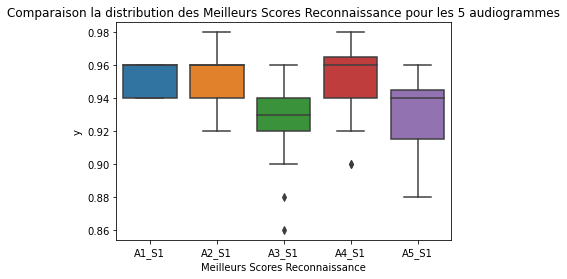

In [75]:
all_arr=dataset1[['A1_S1','A2_S1','A3_S1','A4_S1','A5_S1']]
sns.boxplot(data=all_arr).set(title='Comparaison la distribution des Meilleurs Scores Reconnaissance pour les 5 audiogrammes', xlabel='Meilleurs Scores Reconnaissance', ylabel='y')
plt.savefig('BEST_S1.png', dpi=300, bbox_inches='tight')

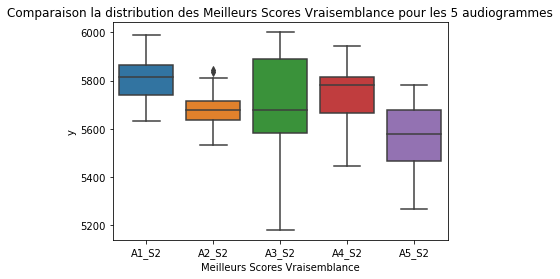

In [76]:
all_arr1=dataset1[['A1_S2','A2_S2','A3_S2','A4_S2','A5_S2']]
sns.boxplot(data=all_arr1).set(title='Comparaison la distribution des Meilleurs Scores Vraisemblance pour les 5 audiogrammes', xlabel='Meilleurs Scores Vraisemblance', ylabel='y')
plt.savefig('BEST_S2.png', dpi=300, bbox_inches='tight')

In [68]:
dataset1=dataset.T
dataset1['min']=dataset1.min(axis=1)
dataset1['max']=dataset1.max(axis=1)
dataset1['mean']=dataset1.mean(axis=1).round(2)
dataset1=dataset1.iloc[:,20:23]
dataset1.to_csv('dataset.csv') 
dataset1

,min,max,mean
Audiogramme1_Score de reco%,0.94,0.96,0.95
Audiogramme1_Score de vraisemblance,5633.60,5988.30,5804.47
Audiogramme2_Score de reco%,0.92,0.98,0.95
Audiogramme2_Score de vraisemblance,5535.44,5845.90,5689.28
Audiogramme3_Score de reco%,0.86,0.96,0.93
Audiogramme3_Score de vraisemblance,5181.16,6000.42,5699.36
Audiogramme4_Score de reco%,0.90,0.98,0.95
Audiogramme4_Score de vraisemblance,5447.68,5944.88,5743.77
Audiogramme5_Score de reco%,0.88,0.96,0.93
Audiogramme5_Score de vraisemblance,5268.76,5784.12,5555.75


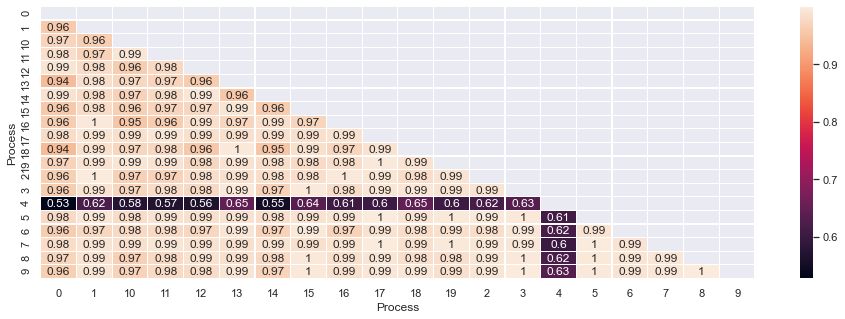

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

#grouped_data1 = data1[["IGSP65_1","IGSP65_2","IGSP65_3","IGSP65_4","IGSP65_5","IGSP65_6","IGSP65_7","IGSP65_8","IGSP65_9","IGSP65_10","IGSP65_11","Score1",'Process']].groupby(['Process'])
#maximums1 = grouped_data1.max()
#maximums = maximums.reset_index()
#maximums1=pd.DataFrame(maximums1)
grouped_data4 = data4[[ "IGSP65_1","IGSP65_2","IGSP65_3","IGSP65_4","IGSP65_5","IGSP65_6","IGSP65_7","IGSP65_8","IGSP65_9","IGSP65_10","IGSP65_11","Score2",'Process']].groupby(['Process'])
maximums2 = grouped_data4.max()
maximums2=pd.DataFrame(maximums2)
df_small = maximums2.iloc[:,0:11]
df_small2=df_small.T
correlation_mat = df_small2.corr()
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (16,5))
sns.heatmap(correlation_mat, annot = True,linewidths=.2,mask=mask)
plt.savefig('plot57.png', dpi=300, bbox_inches='tight')
plt.show()

In [55]:
correlation_mat = df_small2.corr().round(2)
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs=pd.DataFrame(sorted_pairs)
sorted_pairs

0
Process Process      
4       0        0.53
0       4        0.53
4       14       0.55
14      4        0.55
12      4        0.56
...               ...
19      7        1.00
        5        1.00
        19       1.00
3       8        1.00
9       9        1.00

[400 rows x 1 columns]

In [56]:
import pandas as pd
corr_max=sorted_pairs[0].max()
corr_min=sorted_pairs[0].min()
corr_mean=sorted_pairs[0].mean()
print(corr_max,corr_mean,corr_min)
data = [['corr_max', 1.0], ['corr_mean', 0.9657000000000013], ['corr_min', 0.83]] 
df1 = pd.DataFrame(data, columns = ['corr','value'])  
df1

1.0 0.9476000000000023 0.53


,corr,value
0,corr_max,1.0000
1,corr_mean,0.9657
2,corr_min,0.8300
